<a href="https://colab.research.google.com/github/zhgjenny93/Capstones/blob/main/Capstone_1_Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
The diagnosis of breast tumors is traditionally an invasive surgical procedure through performing a biopsy. Research and development is making the diagnosis of cancer a constantly evolving field, with new, less invasive methods of diagnosing cancer becoming more desirable in medical practices. A new method of diagnosing breast cancer is being analyzed in this study. 

Instead of a full biopsy, a fine needle will be used to extract a small fluid sample from a breast tumor. The cell nuclei from the extracted breast tumor sample will be processed and studied in order to determine a benign or malignant diagnosis.

We will be focused on the physical attributes, specifically: area, concavity, symmetry and smoothness, of the nuclei to determine the differences between benign and malignant tumors.

## Hypothesis
$H_0$: There is no significant difference between the area, concavity, symmetry, and smoothness of a malignant tumor cell nucleus versus that of a benign tumor cell nucleus.

$H_a$: There is significant difference between the area, concavity, symmetry, and smoothness of a malignant tumor cell nucleus versus that of a benign tumor cell nucleus.

## Data
The data comes from [UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and contains 569 observations and 33 variables, of which we will only observe the first 11 variables. There are no missing values. 212 of the records are diagnosed as malignant tumors, and 357 of the records are diagnosed as benign tumors.

Specifically, the area-mean, concavity-mean, symmetry-mean, and smoothness-mean fields will be analyzed.

1. The area-mean is measured by counting the number of pixels within a defined boundary of a cell nucleus.

2. The concavity-mean is measured by the extent to which the actual boundary of the nucleus lies on the inside of chords drawn between non-adjacent boundary points. A smaller concavity-mean indicates less concavity.

3. The symmetry-mean is measured by the length difference between lines perpendicular to the major axis across a cell nucleus. A smaller symmetry mean indicates greater symmetry.

4. The smoothness-mean is measured by the difference between the length of a radial line and the mean length of the lines surrounding it. A smaller smoothness mean indicates greater smoothness.

In [ ]:
# Set up environment
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Read in the dataset
breast_cancer = pd.read_csv('https://raw.githubusercontent.com/zhgjenny93/datasets/main/breast_cancer_diagnostics.csv')
print(breast_cancer.shape)

# The study is only interested in the first 11 columns of the dataset. Truncate the dataset.
breast_cancer = breast_cancer.iloc[:, :11]

# Check for missing values
print('Check for Null values:')
print(breast_cancer.isnull().sum())

# Review some summary information on the dataset
breast_cancer.info()
breast_cancer.head()

(569, 33)
Check for Null values:
id                     0
diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   569 non-null    int64  
 1   diagnosis            569 non-null    object 
 2   radius_mean          569 non-null    float64
 3   texture_mean         569 non-null    float64
 4   perimeter_mean       569 non-null    float64
 5   area_mean            569 non-null    float64
 6   smoothness_mean      569 non-null    float64
 7   compactness_mean     569 non-null    float64
 8   concavity_mean       569 non-null    float64
 9   concave points_mean

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


## Methods
For the study, the data will be split into two groups based on benign or malignant diagnosis. The distributions of the physical attributes of the two groups will be checked to see if they are close to normally distributed based on visual inspections of their histograms, and descriptive statistics (kurtosis, skewness, and Shapiro-Wilk). 

If the distributions are normal, an indepedent samples t-test will be conducted between the groups at the two-tail, 95% interval.

If the distributions are not normal, a Kruskal-Wallis test will be conducted to determine if there are statistically significant differences between the two groups.

In [ ]:
malignant = breast_cancer[breast_cancer['diagnosis']=='M']
benign = breast_cancer[breast_cancer['diagnosis']=='B']

print(malignant.shape)
print(benign.shape)

(212, 11)
(357, 11)


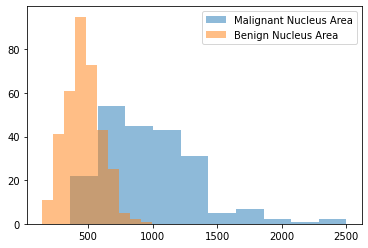

(0.9332621097564697, 2.969658829954369e-08)
(0.9906416535377502, 0.02278628945350647)


Ttest_indResult(statistic=23.938687235690992, pvalue=4.734564310307344e-88)

In [ ]:
# First Hypothesis: Benign tumor nuclei are smaller than malignant tumor nuclei.

# Visually check for normality through histograms
plt.hist(malignant['area_mean'], alpha = 0.5)
plt.hist(benign['area_mean'], alpha = 0.5)

plt.legend(['Malignant Nucleus Area', 'Benign Nucleus Area'])
plt.show()

# Check descriptive statistics with Shapiro-Wilk
print(stats.shapiro(malignant['area_mean']))
print(stats.shapiro(benign['area_mean']))
# The W is close to 1, and the p-value is less than 0.001. The samples are normally distributed.

# Conduct the t-test
stats.ttest_ind(malignant['area_mean'], benign['area_mean'])
# The test reveal a p-value significantly smaller than 0.001, there is significant difference in the area
# of benign and malignant tumor cell nuclei.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


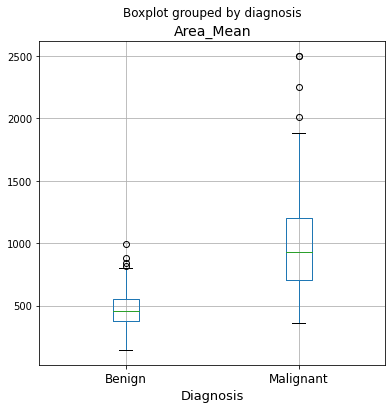

In [ ]:
# Create a boxplot to visually inspect the difference in distribution of records in the same field.
breast_cancer.boxplot('area_mean', by='diagnosis', figsize=(6,6))
plt.title('Area_Mean', fontsize =14)
plt.xticks([1,2],['Benign', 'Malignant'], fontsize = 12)
plt.xlabel('Diagnosis', fontsize = 13)

plt.show()

In [ ]:
# Define function for confidence interval

def get_95_ci(array_1, array_2):
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  mean_diff = sample_2_mean - sample_1_mean
  std_err_diff = math.sqrt((sample_1_var/sample_1_n) + (sample_2_var/sample_2_n))
  margin_of_err = 1.96 * std_err_diff
  ci_lower = mean_diff - margin_of_err
  ci_upper = mean_diff + margin_of_err
  return("The difference in means at the 95% confidence interval (two-tail) is between "+ str(ci_lower)+ " and " + str(ci_upper)+ ".")


In [ ]:
# Find the confidence interval for the difference in means for the area of tumor cell nuclei
print(get_95_ci(benign['area_mean'], malignant['area_mean']))
print("The average area of a benign tumor cell nucleus is {}".format(benign['area_mean'].mean()))

The difference in means at the 95% confidence interval (two-tail) is between 464.1351984332775 and 567.0372395985389.
The average area of a benign tumor cell nucleus is 462.79019607843145


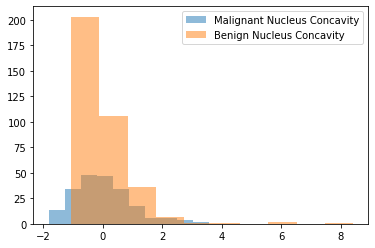

(0.95293128490448, 1.9665981199068483e-06)
(0.7372753620147705, 2.2455432115817253e-23)
DescribeResult(nobs=357, minmax=(0.0, 0.4108), mean=0.04605762100840336, variance=0.0018872204874219448, skewness=3.4586534729093175, kurtosis=20.527388984137698)


KruskalResult(statistic=305.43657612021565, pvalue=2.1545636238729746e-68)

In [ ]:
# Second Hypothesis: Benign tumor nuclei are less severe in concavity than malignant tumor nuclei.

# Plot histograms and perform a visual check for normal distribution
plt.hist(stats.zscore(malignant['concavity_mean']), alpha = 0.5)
plt.hist(stats.zscore(benign['concavity_mean']), alpha = 0.5)

plt.legend(['Malignant Nucleus Concavity', 'Benign Nucleus Concavity'])
plt.show()

# Benign data sample does not appear to be normally distributed, check with descriptive statistics.
print(stats.shapiro(malignant['concavity_mean']))
print(stats.shapiro(benign['concavity_mean']))
print(stats.describe(benign['concavity_mean']))
# Benign data has a W value far from 1, and skewness and kurtosis not conducive to identifying a normal distribution.

# Since the distributions are not normal, conduct a Kruskal-Wallis test
stats.kruskal(malignant['concavity_mean'], benign['concavity_mean'])
# Based on the p-value, we can reject the null that the variables have the same distribution.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


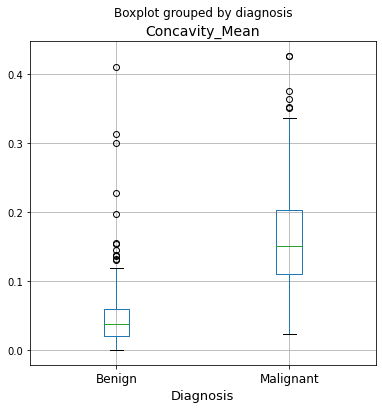

In [ ]:
# Create a boxplot to visually inspect the difference in distribution of records in the same field.
breast_cancer.boxplot('concavity_mean', by='diagnosis', figsize=(6,6))
plt.title('Concavity_Mean', fontsize =14)
plt.xticks([1,2],['Benign', 'Malignant'], fontsize = 12)
plt.xlabel('Diagnosis', fontsize = 13)

plt.show()

In [ ]:
# Find the confidence interval
print(get_95_ci(benign['concavity_mean'], malignant['concavity_mean']))
print("The average concavity of a benign tumor cell nucleus is {}".format(benign['concavity_mean'].mean()))

The difference in means at the 95% confidence interval (two-tail) is between 0.10365862591783591 and 0.12577556602762158.
The average concavity of a benign tumor cell nucleus is 0.04605762100840336


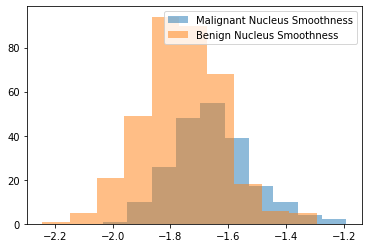

(0.9648756384849548, 4.0841245208866894e-05)
(0.9740927219390869, 5.1829279072990175e-06)


Ttest_indResult(statistic=8.338311789592808, pvalue=5.733384028466827e-16)

In [ ]:
# Third Hypothesis: Benign tumor nuclei are more symmetrical than malignant tumor nuclei.

# Visually inspect plotted histograms for normal distributions
plt.hist(np.log(malignant['symmetry_mean']), alpha = 0.5)
plt.hist(np.log(benign['symmetry_mean']), alpha = 0.5)

plt.legend(['Malignant Nucleus Smoothness', 'Benign Nucleus Smoothness'])
plt.show()

# The data looks normally distributed, double checking with Shapiro-Wilk
print(stats.shapiro(malignant['symmetry_mean']))
print(stats.shapiro(benign['symmetry_mean']))

# The distribution is normal, proceed with T-test
stats.ttest_ind(malignant['symmetry_mean'], benign['symmetry_mean'])
# The p-value is significantly smaller than 0.001, and we can thus reject the null that there is no significant
# difference between the two distributions. 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


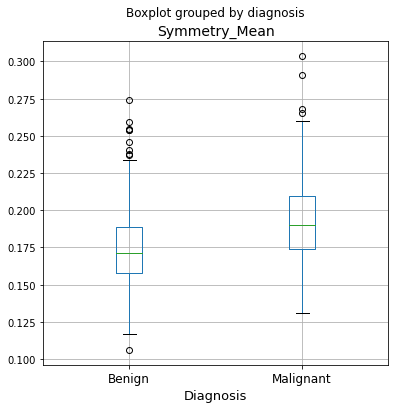

In [ ]:
# Create a boxplot to visually inspect the difference in distribution of records in the same field.
breast_cancer.boxplot('symmetry_mean', by='diagnosis', figsize=(6,6))
plt.title('Symmetry_Mean', fontsize =14)
plt.xticks([1,2],['Benign', 'Malignant'], fontsize = 12)
plt.xlabel('Diagnosis', fontsize = 13)

plt.show()

In [ ]:
# Find the confidence interval
print(get_95_ci(benign['symmetry_mean'], malignant['symmetry_mean']))
print("The average symmetry of a benign tumor cell nucleus is {}".format(benign['symmetry_mean'].mean()))

The difference in means at the 95% confidence interval (two-tail) is between 0.014199284075954392 and 0.023246651656829372.
The average symmetry of a benign tumor cell nucleus is 0.1741859943977591


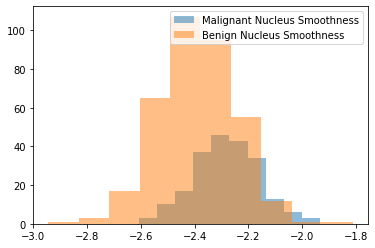

(0.9846862554550171, 0.021497642621397972)
(0.9755095839500427, 9.502091415924951e-06)


Ttest_indResult(statistic=9.146098808149038, pvalue=1.0518503592032013e-18)

In [ ]:
# Fourth Hypothesis: Benign tumor nuclei are more smooth than malignant tumor nuclei.

# First, visually check for normality through plotted histograms
plt.hist(np.log(malignant['smoothness_mean']), alpha = 0.5)
plt.hist(np.log(benign['smoothness_mean']), alpha = 0.5)

plt.legend(['Malignant Nucleus Smoothness', 'Benign Nucleus Smoothness'])
plt.show()

# The data looks normal, let's double check with Shapiro-Wilks
print(stats.shapiro(malignant['smoothness_mean']))
print(stats.shapiro(benign['smoothness_mean']))

# The distribution is normal, proceed with T-test
stats.ttest_ind(malignant['smoothness_mean'], benign['smoothness_mean'])
# The p-value is significantly smaller than 0.001. Thus we can reject the null, there is in fact significant
# difference between the two distributions.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


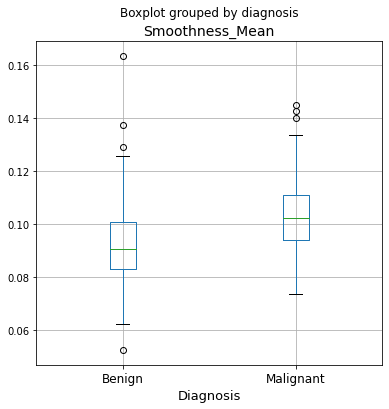

In [ ]:
# Create a boxplot to visually inspect the difference in distribution of records in the same field.
breast_cancer.boxplot('smoothness_mean', by='diagnosis', figsize=(6,6))
plt.title('Smoothness_Mean', fontsize =14)
plt.xticks([1,2],['Benign', 'Malignant'], fontsize = 12)
plt.xlabel('Diagnosis', fontsize = 13)

plt.show()

In [ ]:
# Find the confidence interval
print(get_95_ci(benign['smoothness_mean'], malignant['smoothness_mean']))
print("The average smoothness of a benign tumor cell nucleus is {}".format(benign['smoothness_mean'].mean()))

The difference in means at the 95% confidence interval (two-tail) is between 0.008223997949178195 and 0.012617689065250178.
The average smoothness of a benign tumor cell nucleus is 0.09247764705882357


## Results
Based on visual inspections and descriptive statistics, datasets for the area, symmetry, and smoothness of the tumor cell nuclei are normally distributed. T-tests were conducted for these datasets. Based on their p-values -- all significantly smaller than 0.001, the null hypothesis that there is no significant difference between these physical attributes of benign versus malignant tumor cells can be rejected.

The measurement for concavity provided a non-normal distribution, and a Kruskall-Wallis test is conducted. Based on the p-value, the null hypothesis is rejected. There is significant difference between the two distributions.

Visual inspections through boxplots of the distributions of the physical attributes between malignant and benign tumor cells reveal significant differences.

The 95% confidence intervals suggest the following:
1. The difference in the average area-mean between benign and malignant tumor cell nuclei is between 464.14 and 567.04 pixels. The average benign tumor cell nucleus area is 462.79 pixels.

2. The difference in the average concavity-mean between benign and malignant tumor cell nuclei is between 0.104 and 0.126. The average benign tumor cell nucleus concavity measurement is 0.046.

3. The difference in the average symmetry-mean between benign and malignant tumor cell nuclei is between 0.014 and 0.023. The average benign tumor cell nucleus symmetry measurement is 0.174.


4. The difference in the average smoothness-mean between benign and malignant tumor cell nuclei is between 0.008 and 0.013. The average benign tumor cell nucleus smoothness measurement is 0.092.

## Discussion and Recommendation
Malignant tumor cell nuclei on average, have significantly higher values of area-mean, concavity-mean, symmetry-mean, and smoothness-mean. This shows that breast cancer diagnosis through this less invasive method of extracting a small amount of fluid from the breast tumor using a fine needle is feasible and ideally can be practiced in medical offices. 

As the results of this study ultimately directly impacts the health and wellbeing of people, further extensive testing should be done with a bigger dataset, and a set of guidelines or baseline values for benign tumors should be defined for diagnosis of a breast tumor.